In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df= pd.read_csv("Google_Ads_Cleaned.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,...,Location,Device,Keyword,ROI,Cost_per_Conversion,Click_Level,Cost_Level,Cost_per_Conversion_Level,ROI_Level,Impressions_Level
0,0,0,A1000,Data Analytics Course,104.0,4498.0,231.88,14.0,7.0,0.058000,...,Hyderabad,desktop,learn data analytics,7.159393,33.125714,Low,High,Medium,High,Medium
1,1,1,A1001,Data Analytics Course,173.0,5107.0,216.84,10.0,8.0,0.046000,...,Hyderabad,mobile,data analytics course,6.743036,27.105000,High,Medium,Low,High,High
2,2,2,A1002,Data Analytics Course,90.0,4544.0,203.66,26.0,9.0,0.048979,...,Hyderabad,desktop,data analitics online,6.974074,22.628889,Low,Low,Low,High,Medium
3,3,3,A1003,Data Analytics Course,142.0,3185.0,237.66,17.0,6.0,0.048979,...,Hyderabad,tablet,data anaytics training,4.154422,39.610000,Medium,High,Medium,Low,Low
4,4,4,A1004,Data Analytics Course,156.0,3361.0,195.90,30.0,8.0,0.048979,...,Hyderabad,desktop,online data analytic,4.569168,24.487500,Medium,Low,Low,Low,Low


In [44]:
df.shape

(2600, 22)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               2600 non-null   int64  
 1   Unnamed: 0                 2600 non-null   int64  
 2   Ad_ID                      2600 non-null   object 
 3   Campaign_Name              2600 non-null   object 
 4   Clicks                     2600 non-null   float64
 5   Impressions                2600 non-null   float64
 6   Cost                       2600 non-null   float64
 7   Leads                      2600 non-null   float64
 8   Conversions                2600 non-null   float64
 9   Conversion Rate            2600 non-null   float64
 10  Sale_Amount                2600 non-null   float64
 11  Ad_Date                    2600 non-null   object 
 12  Location                   2600 non-null   object 
 13  Device                     2600 non-null   objec

In [72]:
eda_summary = df.describe()
eda_summary

,Unnamed: 0,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,ROI,Cost_per_Conversion
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,1299.500000,138.956994,4523.280833,215.108508,20.003918,6.519002,0.048979,1498.987692,6.028136,38.045339
std,750.699674,33.865226,860.843133,19.907580,5.976353,2.239987,0.017415,279.327209,1.468858,16.098724
min,0.000000,80.000000,3000.000000,180.010000,10.000000,3.000000,0.015000,1000.000000,3.065534,18.004000
25%,649.750000,111.000000,3778.000000,198.385000,15.000000,5.000000,0.038000,1262.000000,4.888577,25.638611
50%,1299.500000,138.956994,4523.280833,215.570000,20.000000,6.519002,0.048979,1505.000000,5.939455,32.869286
75%,1949.250000,167.000000,5268.250000,232.297500,25.000000,8.000000,0.054000,1728.000000,7.105256,46.861000
max,2599.000000,199.000000,5999.000000,249.890000,30.000000,10.000000,0.123000,2000.000000,10.052632,83.216667


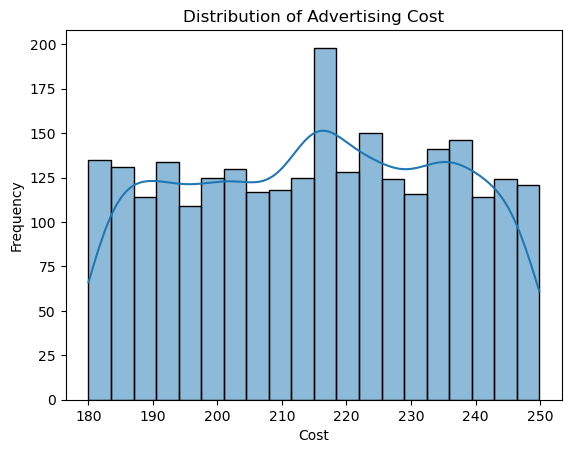

In [20]:
import matplotlib.pyplot as plt
plt.figure()
sns.histplot(df["Cost"],  bins=20, kde=True)
plt.title("Distribution of Advertising Cost")
plt.xlabel("Cost")
plt.ylabel("Frequency")

plt.savefig("EDA_Cost_Distribution.png") 
plt.show()               

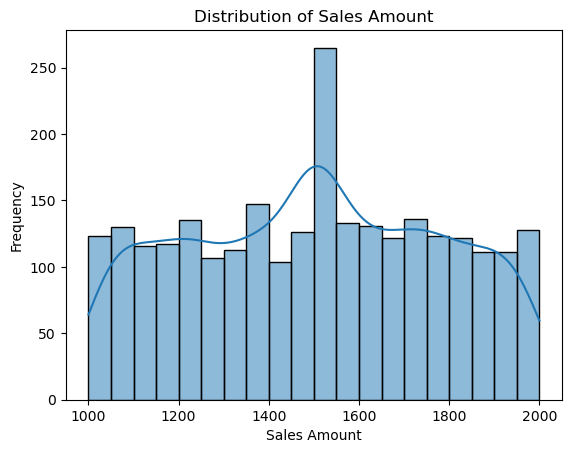

In [21]:
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(df["Sale_Amount"],  bins=20, kde=True)
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")

plt.savefig("EDA_Sale_Distribution.png") 
plt.show()

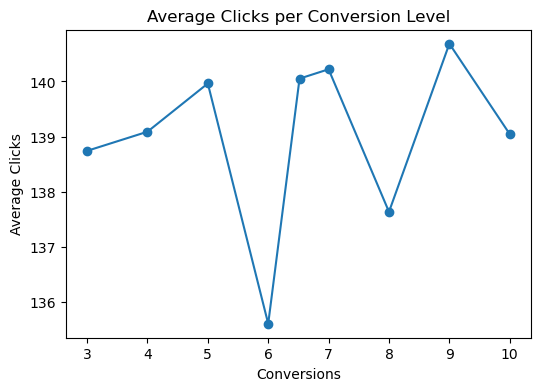

In [8]:
avg_clicks = df.groupby("Conversions")["Clicks"].mean()

plt.figure(figsize=(6,4))
avg_clicks.plot(marker="o")
plt.title("Average Clicks per Conversion Level")
plt.xlabel("Conversions")
plt.ylabel("Average Clicks")

plt.savefig("EDA_Click_per_Conversion.png") 
plt.show()

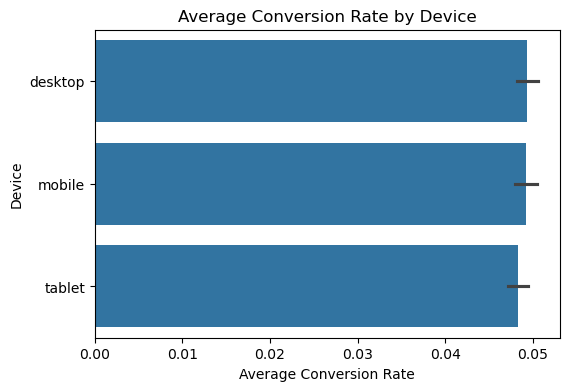

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(
    y="Device",
    x="Conversion Rate",
    data=df,
    estimator="mean"
)
plt.title("Average Conversion Rate by Device")
plt.xlabel("Average Conversion Rate")
plt.ylabel("Device")

plt.savefig("EDA_ConversionRate_per_Device.png") 
plt.show()

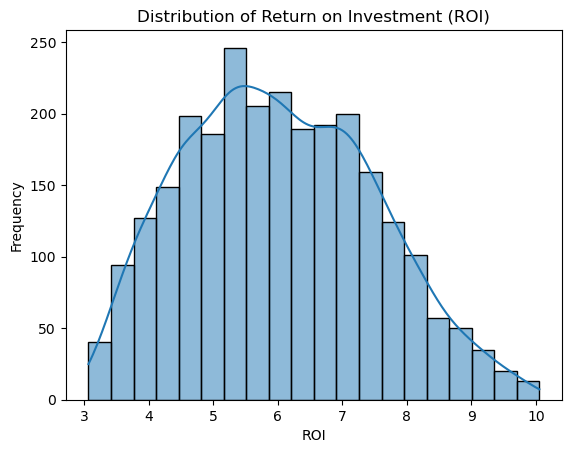

In [23]:
plt.figure()
sns.histplot(df["ROI"],  bins=20, kde=True)
plt.title("Distribution of Return on Investment (ROI)")
plt.xlabel("ROI")
plt.ylabel("Frequency")

plt.savefig("EDA_ROI_Distribution.png") 
plt.show()

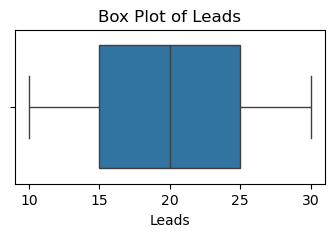

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,2))
sns.boxplot(x="Leads", data=df)
plt.title("Box Plot of Leads")

plt.savefig("EDA_Leads.png") 
plt.show()

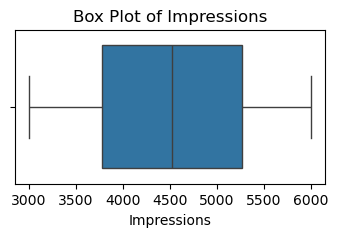

In [25]:
plt.figure(figsize=(4,2))
sns.boxplot(x="Impressions", data=df)
plt.title("Box Plot of Impressions")

plt.savefig("EDA_Impressions.png") 
plt.show()

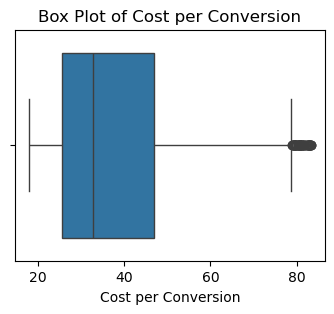

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
sns.boxplot(x=df["Cost_per_Conversion"])
plt.title("Box Plot of Cost per Conversion")
plt.xlabel("Cost per Conversion")

plt.savefig("EDA_Cost_per_Conversion.png") 
plt.show()

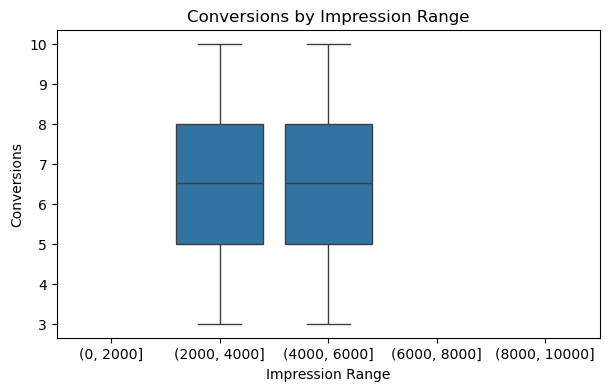

In [27]:
import seaborn as sns

df["Impression_Range"] = pd.cut(
    df["Impressions"],
    bins=[0, 2000, 4000, 6000, 8000, 10000]
)

plt.figure(figsize=(7,4))
sns.boxplot(x="Impression_Range", y="Conversions", data=df)
plt.title("Conversions by Impression Range")
plt.xlabel("Impression Range")
plt.ylabel("Conversions")

plt.savefig("EDA_Conversion_by_Impression.png") 
plt.show()

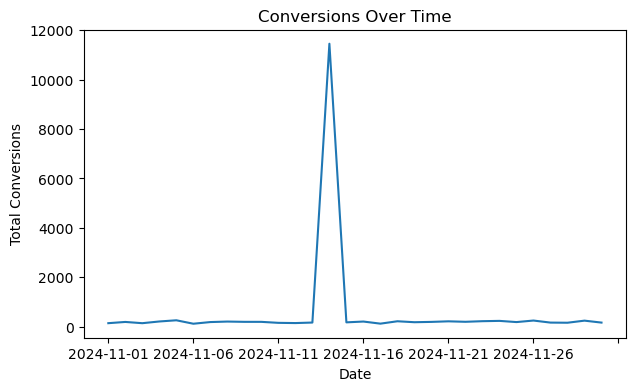

In [28]:
import matplotlib.pyplot as plt

daily_conv = df.groupby("Ad_Date")["Conversions"].sum()

plt.figure(figsize=(7,4))
daily_conv.plot()
plt.title("Conversions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Conversions")

plt.savefig("EDA_Conversion_by_Time.png") 
plt.show()

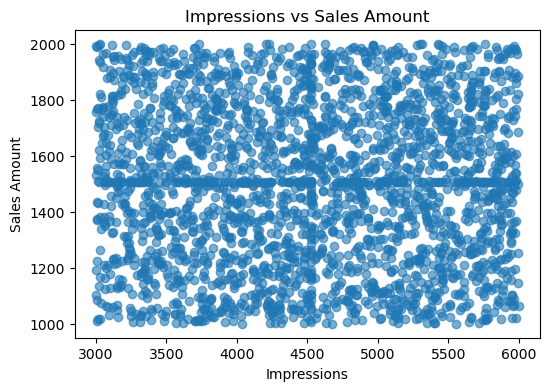

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["Impressions"], df["Sale_Amount"], alpha=0.6)
plt.title("Impressions vs Sales Amount")
plt.xlabel("Impressions")
plt.ylabel("Sales Amount")

plt.savefig("Impressions_vs_Sales.png") 
plt.show()

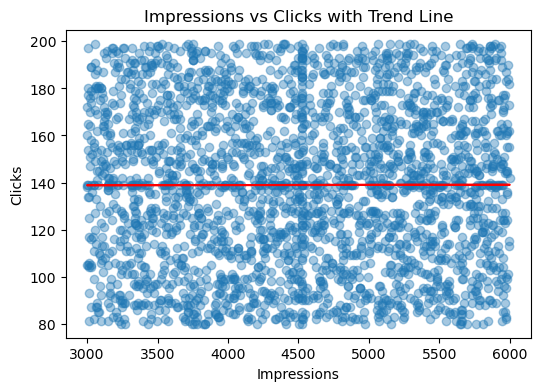

In [54]:
import numpy as np

x = df["Impressions"]
y = df["Clicks"]

plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.4)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")
plt.title("Impressions vs Clicks with Trend Line")
plt.xlabel("Impressions")
plt.ylabel("Clicks")

plt.savefig("Impressions_vs_Clicks.png") 
plt.show()


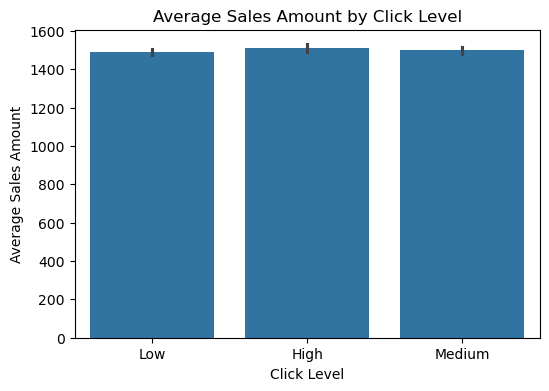

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x="Click_Level",
    y="Sale_Amount",
    data=df,
    estimator="mean"
)
plt.title("Average Sales Amount by Click Level")
plt.xlabel("Click Level")
plt.ylabel("Average Sales Amount")

plt.savefig("Sale_vs_Click_Level.png") 
plt.show()

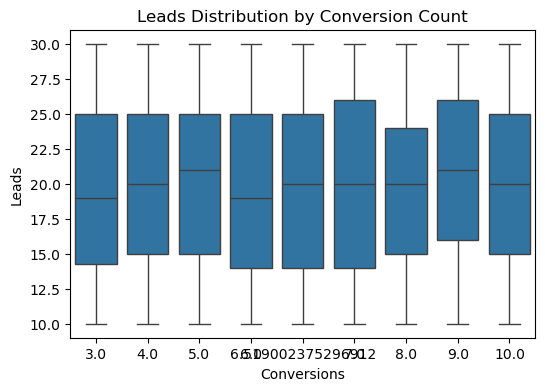

In [56]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x="Conversions", y="Leads", data=df)
plt.title("Leads Distribution by Conversion Count")
plt.xlabel("Conversions")
plt.ylabel("Leads")

plt.savefig("Leads_vs_Conversions.png") 
plt.show()

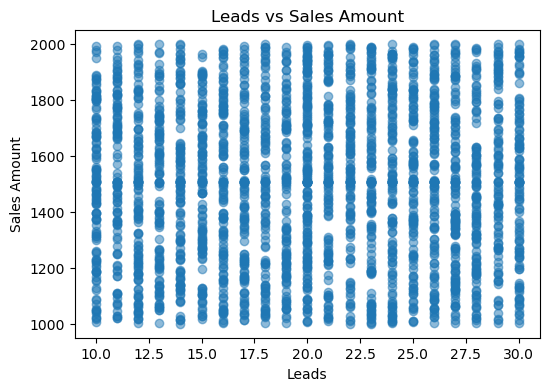

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["Leads"], df["Sale_Amount"], alpha=0.5)
plt.title("Leads vs Sales Amount")
plt.xlabel("Leads")
plt.ylabel("Sales Amount")

plt.savefig("Sale_vs_Leads.png") 
plt.show()

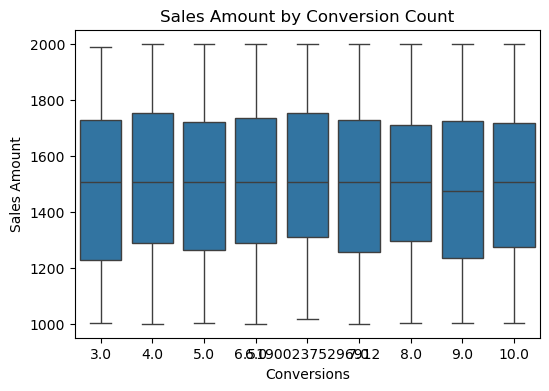

In [59]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x="Conversions", y="Sale_Amount", data=df)
plt.title("Sales Amount by Conversion Count")
plt.xlabel("Conversions")
plt.ylabel("Sales Amount")

plt.savefig("Sale_vs_Conversions.png") 
plt.show()

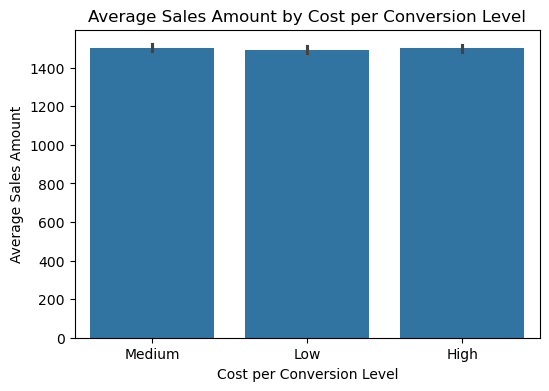

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x="Cost_per_Conversion_Level",
    y="Sale_Amount",
    data=df,
    estimator="mean"
)
plt.title("Average Sales Amount by Cost per Conversion Level")
plt.xlabel("Cost per Conversion Level")
plt.ylabel("Average Sales Amount")

plt.savefig("Sale_vs_Cost_per_Conversion_Level.png") 
plt.show()

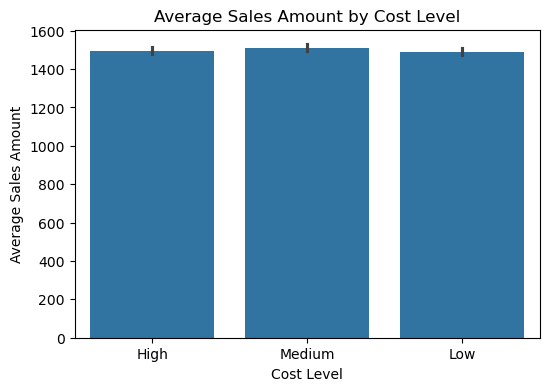

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x="Cost_Level",
    y="Sale_Amount",
    data=df,
    estimator="mean"
)
plt.title("Average Sales Amount by Cost Level")
plt.xlabel("Cost Level")
plt.ylabel("Average Sales Amount")

plt.savefig("Sale_vs_Cost_Level.png") 
plt.show()

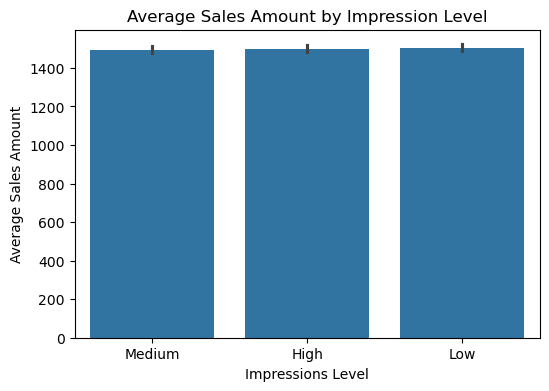

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x="Impressions_Level",
    y="Sale_Amount",
    data=df,
    estimator="mean"
)
plt.title("Average Sales Amount by Impression Level")
plt.xlabel("Impressions Level")
plt.ylabel("Average Sales Amount")

plt.savefig("Sale_vs_Impressions_Level.png") 
plt.show()

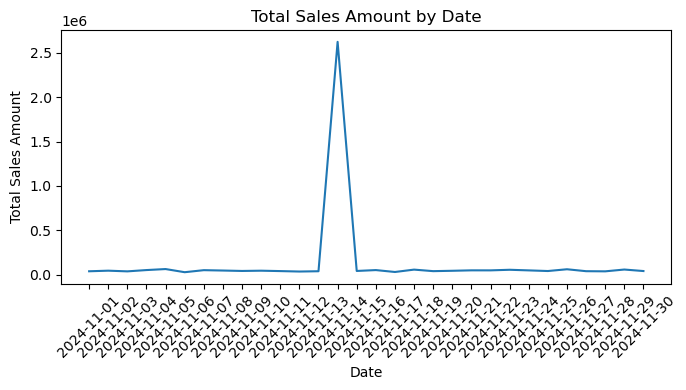

In [63]:
daily_sales = df.groupby("Ad_Date")["Sale_Amount"].sum()

plt.figure(figsize=(7,4))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Total Sales Amount by Date")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("Sale_vs_Date.png") 
plt.show()

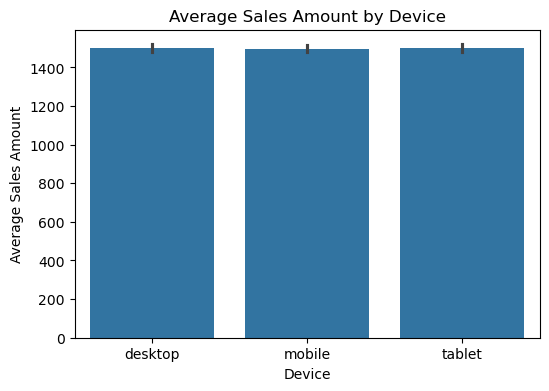

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    x="Device",
    y="Sale_Amount",
    data=df,
    estimator="mean"
)
plt.title("Average Sales Amount by Device")
plt.xlabel("Device")
plt.ylabel("Average Sales Amount")

plt.savefig("Sale_vs_Device.png") 
plt.show()

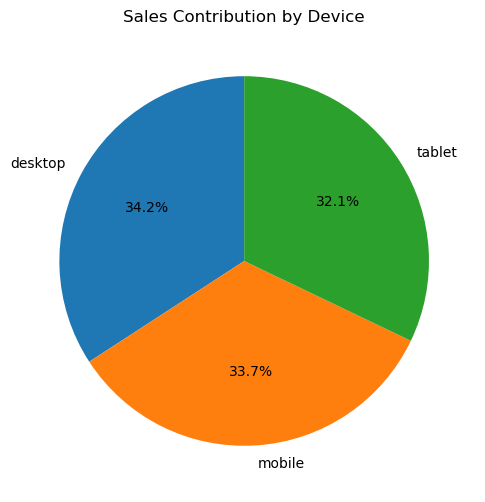

In [65]:
device_sales = df.groupby("Device")["Sale_Amount"].sum()

plt.figure(figsize=(6,6))
plt.pie(
    device_sales,
    labels=device_sales.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Sales Contribution by Device")

plt.savefig("Sale_vs_Device.png") 
plt.show()